<font size = 12>TES Trace Generator </font>

Author: Leonardo Assis Morais

Use this notebook to plot Transition Edge-Sensors (TES) traces.

Summary:

1) Finding Data: Given the folder where all measurement folders are <br>
    located, this section finds the measurement folders, allow the <br> 
    user to choose which measurement should be plotted, and create <br> the folder where the generated figures will be saved. <br>
    * Master Folder -> Measurements 1
    * Master Folder -> Measurements 2
    * ...
2) Data extraction: Extract the data and the register setting <br> 
    required to properly plot the TES traces. <br>
3) Plotting: Plot the traces using the function plot_traces. <br>

<font size = 6, font color = red > WARNING: </font> <br>
Timing information will be plotted properly only when registers for <br>the measurement are found.

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tes

In [14]:
%reload_ext autoreload

# Finding data

Use the first cell to access the folder where the measurements are <br>
stored in your computer and the second to choose which measurement <br>
to analyse.

In [15]:
# write the address where the measurement folder is located in your
# computer
ADDRESS = '/Users/leo/TES_package_and_data/Data Leo/testing_traces'

In [16]:
from tes.folder_management import find_folders

folder = (ADDRESS)
measurements = find_folders(folder)

In the selected path 2 measurement folders were found.
Choose the folder to be analysed using its index.
Option 0: 
 /Users/leo/TES_package_and_data/Data Leo/testing_traces/trace-pulse-pulse_threshold-peakleotrace
Option 1: 
 /Users/leo/TES_package_and_data/Data Leo/testing_traces/trace-pulse-pulse_threshold-peakleotrace1


In [17]:
from tes.folder_management import manage_folders

# choose measurement folder according to the messages printed above
choose_meas = 0

datapath, folder_analysis, folder_figures = manage_folders(choose_meas,
                                                           measurements
                                                          )

The analysed data is stored in: 
 Option 0: /Users/leo/TES_package_and_data/Data Leo/testing_traces/trace-pulse-pulse_threshold-peakleotrace
The figures generated will be saved in: 
 /Users/leo/TES_package_and_data/Data Leo/testing_traces/trace-pulse-pulse_threshold-peakleotrace/Figures


# Data Extraction

Extracting data to be plotted and registers <br>
(the last is needed to plot traces with correct time information).

In [18]:
from tes.traces import extract_data

(data, registers) = extract_data(datapath, measurements)

Registers were found for: /Users/leo/TES_package_and_data/Data Leo/testing_traces/trace-pulse-pulse_threshold-peakleotrace
No register was found for /Users/leo/TES_package_and_data/Data Leo/testing_traces/trace-pulse-pulse_threshold-peakleotrace1
Data succesfully extracted.


# Plotting

In [19]:
# filename for saving the figure
FILENAME = 'TES_traces.pdf'

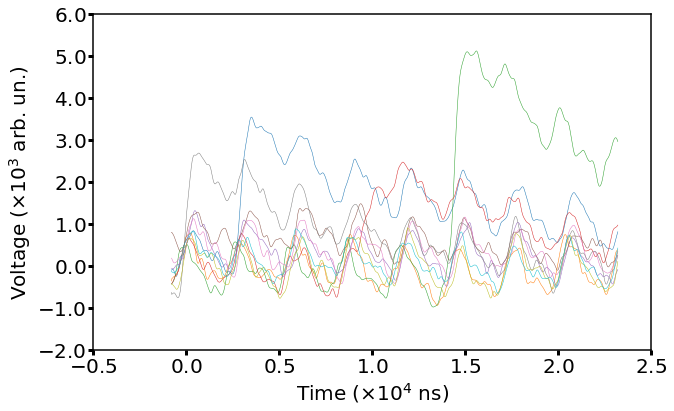

In [20]:
%matplotlib inline
from tes.traces import plot_traces

# plot parameters
TRACE_NUMBER = 10   # number of traces plotted
TRACE_LENGTH = 3000 # number of points in each trace
CHOOSE_TRACE = 5    # choose which trace to plot if TRACE_NUMBER == 1

# figure size
FIG_WIDTH = 10
GOLDEN_RATIO = (np.sqrt(5.0)-1.0)/2.0

# needed for plotting time information correctly
time_register = registers[choose_meas]

fig, ax = plt.subplots(figsize=[FIG_WIDTH, FIG_WIDTH*GOLDEN_RATIO])
plot_traces(data, ax, TRACE_NUMBER, TRACE_LENGTH, time_register, CHOOSE_TRACE)

# uncomment next line to save plot
#fig.savefig(str(folder_figures)+FILENAME, bbox_inches = 'tight', dpi = 300)

<font size = 12>END OF NOTEBOOK </font>